<a href="https://colab.research.google.com/github/amrutha-07/Forest-Classification/blob/main/Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


In [ ]:
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt

In [ ]:

import joblib

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:

import seaborn as sns

In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
dataset= pd.read_csv("/content/train.csv")
dataset


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
dataset.isnull().sum()


Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [ ]:
x= dataset.drop('Cover_Type',axis=1)
x


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,0
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,0
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,0
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=dataset['Cover_Type']
y


0        5
1        5
2        2
3        2
4        5
        ..
15115    3
15116    3
15117    3
15118    3
15119    3
Name: Cover_Type, Length: 15120, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)


In [ ]:
from sklearn.svm import SVC


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear')
# Train the classifier on the training data


In [ ]:
svm_classifier.fit(X_train, y_train)
# Make predictions on the test data


In [ ]:
y_pred1 = svm_classifier.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)


In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

Accuracy: 0.6937830687830688
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.65      0.66       439
           2       0.57      0.54      0.55       411
           3       0.60      0.52      0.56       418
           4       0.79      0.89      0.84       438
           5       0.75      0.72      0.73       428
           6       0.60      0.63      0.62       471
           7       0.84      0.91      0.87       419

    accuracy                           0.69      3024
   macro avg       0.69      0.69      0.69      3024
weighted avg       0.69      0.69      0.69      3024

Confusion Matrix:
[[285  73   1   0  10   3  67]
 [ 98 220  14   0  57  15   7]
 [  0   0 219  61  13 125   0]
 [  0   0  25 389   0  24   0]
 [  4  82   8   0 308  26   0]
 [  0  14  97  42  23 295   0]
 [ 37   0   0   0   0   0 382]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_split=2,min_samples_leaf=1)


In [ ]:
rf_classifier.fit(X_train,y_train)
# Make predictions on the test data


RandomForestClassifier(random_state=42)

In [ ]:
y_pred=rf_classifier.predict(X_test)
# Calculate the accuracy of the classifier


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.857473544973545
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.75      0.77       439
           2       0.76      0.69      0.73       411
           3       0.81      0.84      0.82       418
           4       0.93      0.97      0.95       438
           5       0.88      0.94      0.91       428
           6       0.88      0.85      0.86       471
           7       0.92      0.96      0.94       419

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.86      0.86      0.86      3024

Confusion Matrix:
[[328  72   1   0   6   1  31]
 [ 70 285  13   0  31   6   6]
 [  0   0 351  25   5  37   0]
 [  0   0   9 425   0   4   0]
 [  0  17   5   0 401   5   0]
 [  0   0  54   7  11 399   0]
 [ 14   1   0   0   0   0 404]]


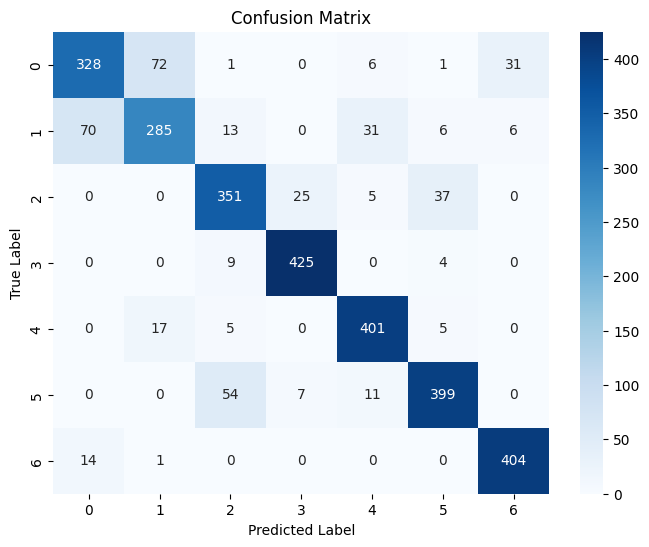

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()